# Possible Perception of Failure following Net Zero

In [1]:
# __authors__: Noah Diffenbaugh, Elizabeth Barnes and Patrick Keys
# __date__: May 18, 2022

In [2]:
import imp
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import datetime
from icecream import ic

import data_processing, plots, experiment_settings

import cartopy as ct
import palettable
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["figure.dpi"] = 150
savefig_dpi = 300
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
import warnings
warnings.filterwarnings("ignore")

FS = 10
plt.rc('text',usetex=True)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']}) 
plt.rc('savefig',facecolor='white')
plt.rc('axes',facecolor='white')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('xtick',color='dimgrey')
plt.rc('ytick',color='dimgrey')

map_proj = ct.crs.EqualEarth(central_longitude = 0.)

In [3]:
EXP_NAME = "exp100"
settings = experiment_settings.get_settings(EXP_NAME)
TREND_YEARS_NETZERO = (settings["focus_year"],settings["focus_year"]+(settings["time_horizon"]-1))
TREND_YEARS_PREZERO = (settings["focus_year"]-settings["time_horizon"],settings["focus_year"]-1)

In [4]:
YEAR_RANGE = (1850,1910)
DATA_DIRECTORY = 'data/'
FIGURE_DIRECTORY = 'figures/'
SHAPE_DIRECTORY = 'shapefiles/'
POP_DIRECTORY = DATA_DIRECTORY + "popdynamics-1-8th-pop-base-year-projection-ssp-2000-2100-rev01-proj-ssp1-netcdf/SSP1/Total/NetCDF/"

## Get the data

In [5]:
imp.reload(data_processing)
# mask = data_processing.get_land_mask(DATA_DIRECTORY + 'sftlf_fx_CESM2-WACCM_historical_r1i1p1f1_gn.nc', var="sftlf")
da_all, filenames = data_processing.get_data(DATA_DIRECTORY, 
                                             YEAR_RANGE,
                                             N_MEMBERS = settings["n_members"], 
                                             filenames=settings["filenames"],
                                             ssp=settings["ssp"], 
                                             time_horizon=settings["time_horizon"]
                                            )

tas_Amon_historical_ssp126_CanESM5_r1-10_ncecat_ann_mean_2pt5degree.nc
tas_Amon_historical_ssp126_MIROC6_r1-10_ncecat_ann_mean_2pt5degree.nc
tas_Amon_historical_ssp126_ACCESS-ESM1-5_r1-10_ncecat_ann_mean_2pt5degree.nc
tas_Amon_historical_ssp126_UKESM1-0-LL_r1-10_ncecat_ann_mean_2pt5degree.nc
tas_Amon_historical_ssp126_MIROC-ES2L_r1-10_ncecat_ann_mean_2pt5degree.nc
tas_Amon_historical_ssp126_CNRM-CM6-1_r1-5_ncecat_ann_mean_2pt5degree.nc
tas_Amon_historical_ssp126_CNRM-ESM2-1_r1-5_ncecat_ann_mean_2pt5degree.nc
tas_Amon_historical_ssp126_GISS-E2-1-G_r1-5_ncecat_ann_mean_2pt5degree.nc
tas_Amon_historical_ssp126_IPSL-CM6A-LR_r1-5_ncecat_ann_mean_2pt5degree.nc
tas_Amon_historical_ssp126_MRI-ESM2-0_r1-5_ncecat_ann_mean_2pt5degree.nc
da_all.shape = (50, 61, 72, 144)


In [7]:
imp.reload(data_processing)

# --------------------------------
# PRE-ZERO trends
da_mean_trends_all_prezero = data_processing.compute_trends(da_all.mean("member"), 1850, 1900)
ic(da_mean_trends_all_prezero.shape)

da_trends_prezero = data_processing.compute_trends(da_all, 1850, 1900)
ic(da_trends_prezero.shape)

# --------------------------------
# NETZERO trends
da_mean_trends_all_netzero = data_processing.compute_trends(da_all.mean("member"), 1850, 1900)
ic(da_mean_trends_all_netzero.shape)

da_trends_netzero = data_processing.compute_trends(da_all, 1850, 1900)
ic(da_trends_netzero.shape)


ic| da_mean_trends_all_prezero.shape: (2, 72, 144)
ic| da_trends_prezero.shape: (2, 50, 72, 144)
ic| da_mean_trends_all_netzero.shape: (2, 72, 144)
ic| da_trends_netzero.shape: (2, 50, 72, 144)


(2, 50, 72, 144)

In [8]:
error('here')

NameError: name 'error' is not defined

## Figure 1

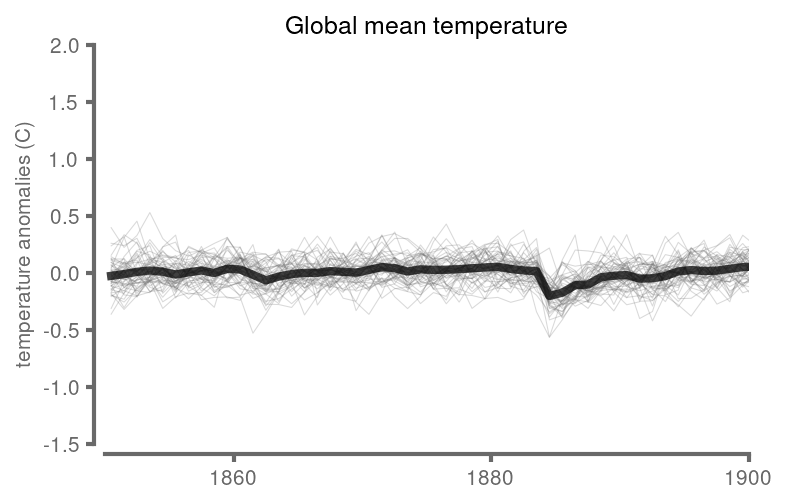

In [9]:
imp.reload(plots)
PLOT_MEMBER = settings["plot_member"]
MULT_FACTOR = 10
#------------------------
# fig = plt.figure(figsize=(13,3*3))
fig = plt.figure(figsize=(5.0*1.5*2,3.75*1.3*3))
spec = fig.add_gridspec(ncols=4, nrows=3, height_ratios=[.75,1,1], width_ratios=[1,.6,.6,1])
vbound = 0.15*MULT_FACTOR
#------------------------

ax = fig.add_subplot(spec[0,1:3])

global_mean_temp = data_processing.compute_global_mean(da_all)
plt.plot(global_mean_temp["time"]+.5,global_mean_temp.T, color='dimgray',linewidth=.5,alpha=.25)
plt.plot(global_mean_temp["time"]+.5,np.mean(global_mean_temp,0), color='k',linewidth=4., alpha=.75)

plots.format_spines(plt.gca())
ymin, ymax = plt.gca().get_ylim()
plt.xticks(np.arange(1800,2100,20),np.arange(1800,2100,20))
plt.yticks(np.arange(-10.0,10.0,.5),np.round(np.arange(-10.0,10.0,.5),2))
plt.ylabel('temperature anomalies (C)')
# plt.xlabel('year')    
plt.xlim(1850,1900)
plt.ylim(-1.5,2.0)

plt.title('Global mean temperature')
#------------------------

# for MASK_BOOL in (False,):
#     for data_type in ("all","member"):
#         for start_year in (2025, 2035):

#             if data_type=="member":
#                 if start_year == 2025:            
#                     da_plot = da_trends_prezero[0,PLOT_MEMBER,:,:].squeeze()  
#                     title_text = "(D) Member \#" + str(PLOT_MEMBER+1) + " trends, " + str(1850) + "-" + str(1900)               
#                     specs = (2,0)
#                 elif start_year == 2035:
#                     da_plot = da_trends_netzero[0,PLOT_MEMBER,:,:].squeeze()
#                     title_text = "(E) Member \#" + str(PLOT_MEMBER+1) + " trends, " + str(1850) + "-" + str(1900)               
#                     specs = (2,2)
#             elif data_type=="all":
#                 if start_year == 2025:            
#                     da_plot = da_mean_trends_all_prezero[0,:,:].squeeze()            
#                     title_text = "(B) Ensemble mean trends, " +  str(1850) + "-" + str(1900)               
#                     specs = (1,0)
#                 elif start_year == 2035:
#                     da_plot = da_mean_trends_all_netzero[0,:,:].squeeze()
#                     title_text = "(C) Ensemble mean trends, " + str(1850) + "-" + str(1900)               
#                     specs = (1,2)


#             if MASK_BOOL:
#                 da_plot_member = da_plot * mask
#                 da_positive_trends = np.ceil(np.abs(da_plot_member.where(da_plot_member>=settings["warming_cutoff"],0.,drop=False)))
#                 da_positive_trends = da_positive_trends * mask
#             else:
#                 da_plot_member = da_plot
#                 da_positive_trends = np.ceil(np.abs(da_plot_member.where(da_plot_member>=settings["warming_cutoff"],0.,drop=False)))        
#             frac = data_processing.compute_global_mean( da_positive_trends )

#             ax = fig.add_subplot(spec[specs[0],specs[1]:specs[1]+2],projection=map_proj)
#             cb,image = plots.drawOnGlobe(ax, 
#                               map_proj, 
#                               data=da_plot_member*MULT_FACTOR, 
#                               lats=da_plot_member["lat"],
#                               lons=da_plot_member["lon"],
#                               cmap='RdBu_r',
#                               vmin= -vbound, 
#                               vmax= vbound, 
#                               inc=None, 
#                               cbarBool=False, 
#                               contourMap=[], 
#                               contourVals = [], 
#                               fastBool=True, 
#                               extent='both',
#                              )   
#             ax.text(0,-50,str(int((100*frac).round())) + '\% of area warming',color='black', fontsize=8, transform=ct.crs.PlateCarree())

#             image.set_clim(-vbound,vbound)
#             ax.xaxis.set_visible(False)
#             ax.yaxis.set_visible(False) 
#             ax.set_title(title_text)

#     # set colorbar        
#     axs = fig.axes
#     bounds = np.round(np.arange(-.2,.29,.1),3)*MULT_FACTOR
#     cb = fig.colorbar(image, ax=axs, 
#                       shrink=0.3, 
#                       ticks=bounds,
#                       location='bottom',
#                       pad=.05,
#                       extend='both',
#                       label='degrees C per decade',
#                      )
#     cb.set_ticklabels(['-2', '-1', '0', '1', '2'])
    
    # plt.tight_layout() 
plt.savefig(FIGURE_DIRECTORY + EXP_NAME + '_five_panel_trends_member' + str(PLOT_MEMBER) + '.png',  bbox_inches='tight', dpi=savefig_dpi)
plt.show()

# Hovmoller over time horizon

In [10]:
YEAR_VEC      = np.arange(TREND_YEARS_NETZERO[0],YEAR_RANGE[1]+1)
fail_grid     = np.zeros((len(YEAR_VEC),len(da_all["lat"])))*np.nan
fail_grid_fix = np.zeros((len(YEAR_VEC),len(da_all["lat"])))*np.nan

for iyear, year in enumerate(YEAR_VEC):
    if iyear > 0:
        hov_trends = data_processing.compute_trends(da_all, TREND_YEARS_NETZERO[0], year)
        da_plot = hov_trends[0,:,:,:].squeeze()
        da_quad_1 = xr.where((da_plot>=settings["warming_cutoff"]), 1, 0) 
        da_quad = (da_quad_1).sum("member")/len(da_plot["member"].values)   
        fail_grid[iyear,:] = da_quad.mean("lon")*100

    if year <= YEAR_RANGE[1] - (settings["time_horizon"]-1):
        hov_trends = data_processing.compute_trends(da_all, year, year+(settings["time_horizon"]-1))
        da_plot = hov_trends[0,:,:,:].squeeze()
        da_quad_1 = xr.where((da_plot>=settings["warming_cutoff"]), 1, 0) 
        da_quad = (da_quad_1).sum("member")/len(da_plot["member"].values)   
        fail_grid_fix[iyear,:] = da_quad.mean("lon")*100  


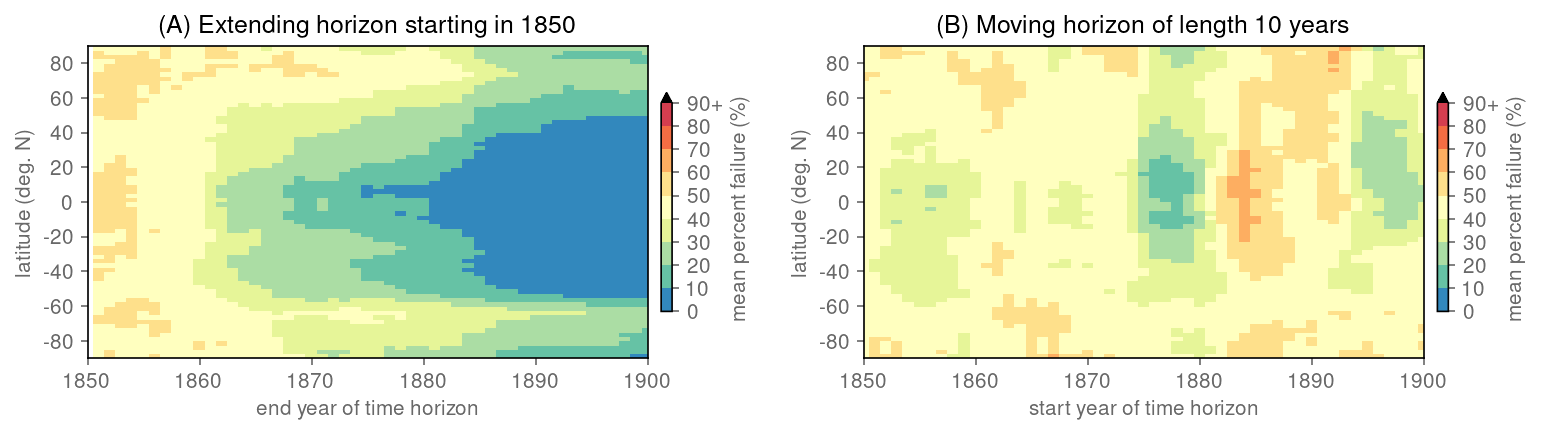

In [11]:
cmap = palettable.colorbrewer.diverging.Spectral_9_r.mpl_colors
# cmap = np.delete(cmap,(0,1,3,6),0)
cmap = ListedColormap(cmap)

#----------------------------- 
fig = plt.figure(figsize=(14*.75,4*.75))

# plot progressively add years
ax = fig.add_subplot(1,2,1)
p = plt.pcolor(YEAR_VEC,da_all["lat"],fail_grid.T,cmap=cmap)

plt.ylabel('latitude (deg. N)')
plt.xlabel('end year of time horizon')
plt.xticks(np.arange(TREND_YEARS_NETZERO[0],YEAR_RANGE[1],10),np.arange(TREND_YEARS_NETZERO[0],YEAR_RANGE[1],10))
plt.yticks(np.arange(-80,100,20),np.arange(-80,100,20))
plt.xlim(1850,1900)

p.set_clim(0.0,90)
p.cmap.set_over('k')
cbar = plt.colorbar(p,ax=plt.gca(),label='mean percent failure (\%)',ticks=(0,10,20,30,40,50,60,70,80,90), extend="max",orientation='vertical',pad=.02,shrink=.7)
cbar.ax.set_yticklabels(('0','10','20','30','40','50','60','70','80','90+'))
plt.title('(A) Extending horizon starting in ' + str(settings["focus_year"]))

# plot moving time_horizon window
ax = fig.add_subplot(1,2,2)
p = plt.pcolor(YEAR_VEC,da_all["lat"],fail_grid_fix.T,cmap=cmap)

plt.ylabel('latitude (deg. N)')
plt.xlabel('start year of time horizon')
plt.xticks(np.arange(TREND_YEARS_NETZERO[0],YEAR_RANGE[1],10),np.arange(TREND_YEARS_NETZERO[0],YEAR_RANGE[1],10))
plt.yticks(np.arange(-80,100,20),np.arange(-80,100,20))
plt.title('(B) Moving horizon of length ' + str(settings["time_horizon"]) + ' years')
plt.xlim(1850,1900)

p.set_clim(0.0,90)
p.cmap.set_over('k')
cbar = plt.colorbar(p,ax=plt.gca(),label='mean percent failure (\%)',ticks=(0,10,20,30,40,50,60,70,80,90), extend="max",orientation='vertical',pad=.02,shrink=.7)
cbar.ax.set_yticklabels(('0','10','20','30','40','50','60','70','80','90+'))


plt.tight_layout()
plt.savefig(FIGURE_DIRECTORY + EXP_NAME + '_timeprogression_pcolor_failures' + '.png' , bbox_inches="tight", dpi=savefig_dpi)
plt.show() 